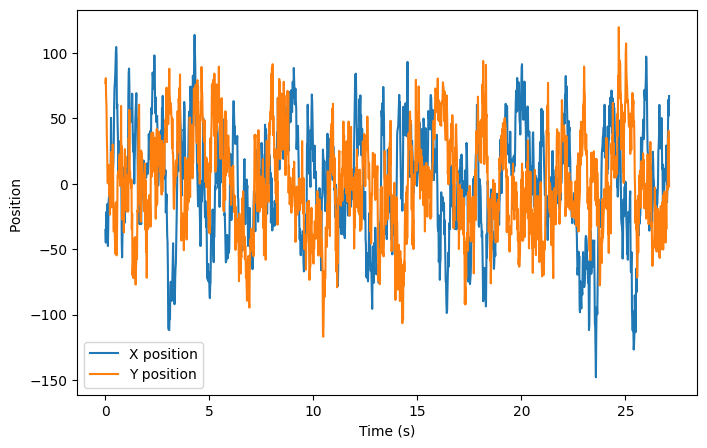

In [1]:
import numpy as np
from matplotlib import pyplot as plt
filename = "20230209_182750"
filepath = f"data/{filename}.txt"

with open(filepath, 'r') as file:
    time_val, x_val, y_val = [], [], []
    for line in file:
        values = line.strip().split('\t')
        time_val.append(float(values[0]))
        x_val.append(float(values[1]))
        y_val.append(float(values[2]))
time_val, x_val, y_val = np.array(time_val), np.array(x_val), np.array(y_val)

plt.figure(figsize=(8,5))
plt.plot(time_val, x_val, label='X position')
plt.plot(time_val, y_val, label='Y position')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position ")
plt.show()

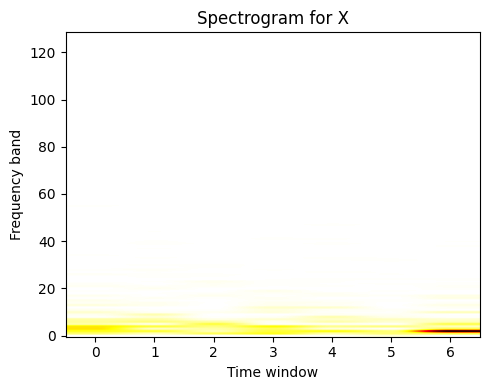

In [2]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(x_val)
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram for X')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

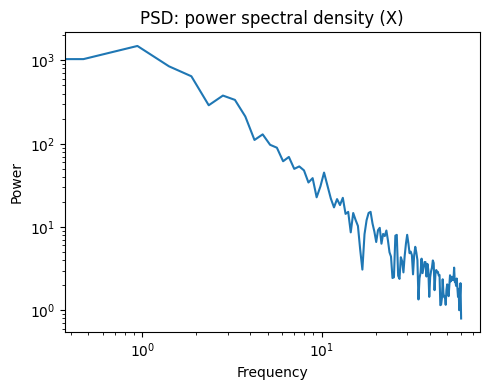

In [3]:
freqs, psd = signal.welch(x_val)

video_FPS = 60
freqs *= 2 * video_FPS
psd /= video_FPS

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.yscale("log")
plt.xscale("log")
plt.title('PSD: power spectral density (X)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

Lorentzian fit coefficients:
psi_0 = 917.0203219548155
fc_0 = 2.398807491221058
k = 0.0011713723704803527 (T= 298K)


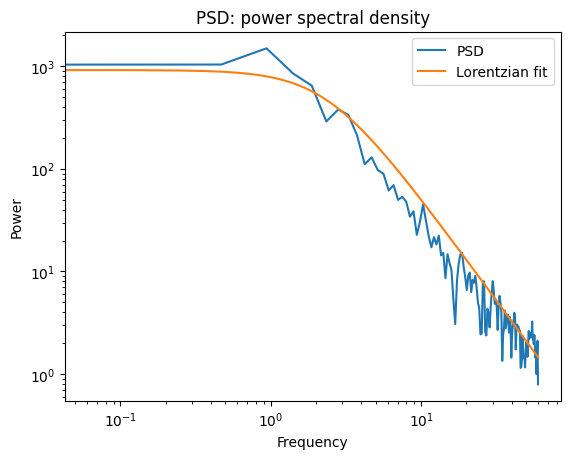

In [4]:
def lorentzian(x, psi0, fc):
    return psi0/(1+(x/fc)**2)

from scipy.optimize import curve_fit

# Plot the PSD data
plt.plot(freqs, psd, label='PSD')

# Fit the Lorentzian function to the PSD data
popt, pcov = curve_fit(lorentzian, freqs, psd, p0=[1, 1])

# Get the coefficients of the Lorentzian fit
psi0_fit, fc_fit = popt[0], abs(popt[1])

# Generate the Lorentzian fit curve
freq_fit = np.linspace(np.min(freqs), np.max(freqs), 1000)
psd_fit = lorentzian(freq_fit, *popt)

print("Lorentzian fit coefficients:")
print("psi_0 =", psi0_fit)
print("fc_0 =", fc_fit)
print("k =", 2*(1.38E-23)*293.15/(3.14*psi0_fit*fc_fit)*1E+21, ("(T= 298K)"))

# Plot the Lorentzian fit curve
plt.plot(freq_fit, psd_fit, label='Lorentzian fit')
plt.yscale("log")
plt.xscale("log")
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
# Show the plot
plt.legend()
plt.show()

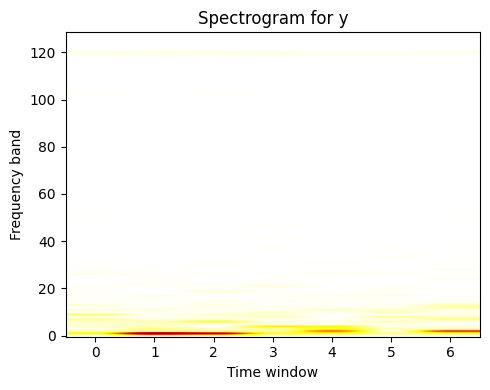

In [5]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(y_val)
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram for y')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

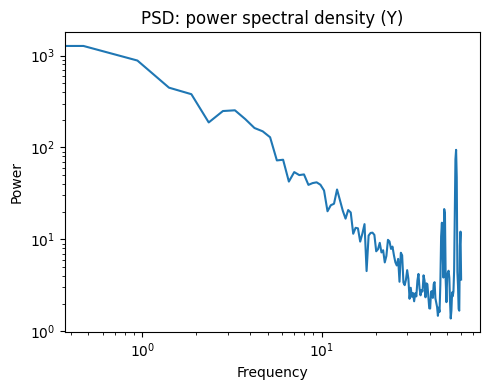

In [6]:
freqs, psd = signal.welch(y_val)

video_FPS = 60
freqs *= 2 * video_FPS
psd /= video_FPS

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.yscale("log")
plt.xscale("log")
plt.title('PSD: power spectral density (Y)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

Lorentzian fit coefficients:
psi_0 = 794.6645218257321
fc_0 = 2.0264725519493436
k = 0.0016000913691113956 (T= 298K)


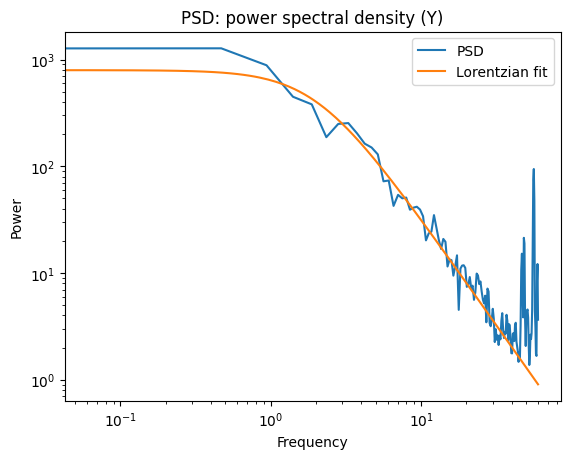

In [7]:
# Plot the PSD data
plt.plot(freqs, psd, label='PSD')

# Fit the Lorentzian function to the PSD data
popt, pcov = curve_fit(lorentzian, freqs, psd, p0=[1, 1])

# Get the coefficients of the Lorentzian fit
psi0_fit, fc_fit = popt[0], abs(popt[1])

# Generate the Lorentzian fit curve
freq_fit = np.linspace(np.min(freqs), np.max(freqs), 1000)
psd_fit = lorentzian(freq_fit, *popt)

print("Lorentzian fit coefficients:")
print("psi_0 =", psi0_fit)
print("fc_0 =", fc_fit)
print("k =", 2*(1.38E-23)*293.15/(3.14*psi0_fit*fc_fit)*1E+21, ("(T= 298K)"))

# Plot the Lorentzian fit curve
plt.plot(freq_fit, psd_fit, label='Lorentzian fit')
plt.yscale("log")
plt.xscale("log")
plt.title('PSD: power spectral density (Y)')
plt.xlabel('Frequency')
plt.ylabel('Power')
# Show the plot
plt.legend()
plt.show()